# <center>Generalized uniform scenario - Methods</center>

In this notebook we extend the framwork of the paper named "Numerical Analysis of Asymmetric First Price Auctions", we'll refer to this paper as [Marshall1994]. This paper provides numerical methods to estimate the equilibrium strategy profile of a first price auction in the following scenarios :

1. A **Coalition of $k_1$ bidders** vs a **Countercoalition of $k_2$ bidders**. All the bidders draw their (individual) values from $\text{Unif}[0,1]$
2. A **Coalition of $k_1$ bidders** vs **$k_2$ Individuals**. All the bidders draw their (individual) values from $\text{Unif}[0,1]$

we extend their method to consider the following scenario :

A **coalition of $k_1$ bidders** vs a **coalition of $k_2$ bidders** vs **$k_3$ individuals**. All the bidders draw their (individual) values from $\text{Unif}[0,1]$

<font color=green>[New] 
- [02-25-20] The method is fixed for the case : $k_1=0$ or $k_2=0$
</font>
<font color=gray>[ToDo] 
- Check analytically that $t_* \in [\min(l_1^{-1},l_2^{-1},l_3^{-1}),\max(l_1^{-1},l_2^{-1},l_3^{-1})]$
- Check analytically that $\epsilon_j$ decreases to $0$  when $j \rightarrow 0$
</font>

## <center>Theory</center>

We denote $\lambda_1, \lambda_2$ the value functions (inverse of the bid function) of the first and second coalition respectively, and $\lambda_3$ the value function of a non-cooperative individual outside the coalitions.

- The interim expected utility of the first coalition given the value $v$ and the bid $b$ is : $ U_1(v,b)=(v-b)\lambda_2(b)^{k_2}\lambda_3(b)^{k_3} $
- The interim expected utility of the second coalition given the value $v$ and the bid $b$ is : $ U_2(v,b)=(v-b)\lambda_1(b)^{k_1}\lambda_3(b)^{k_3} $
- The interim expected utility of an individual outside the coalitions, who values the item $v$ and bid $b$ is :
$ U_3(v,b)=(v-b)\lambda_1(b)^{k_1}\lambda_2(b)^{k_2}\lambda_3(b)^{k_3-1} $

### Differential system

The first-order optimality condition leads to the following differential system :
$$
(\lambda_1(t) - t) \left[ k_2\lambda_2'(t)\lambda_3(t)+k_3\lambda_3'(t)\lambda_2(t) \right] = \lambda_2(t)\lambda_3(t)
 \qquad (1) \\
(\lambda_2(t) - t) \left[ k_1\lambda_1'(t)\lambda_3(t)+k_3\lambda_3'(t)\lambda_1(t) \right] = \lambda_1(t)\lambda_3(t)
 \qquad (2) \\
(\lambda_3(t) - t) \left[ k_1\lambda_1'(t)\lambda_2(t)\lambda_3(t)+k_2\lambda_2'(t)\lambda_1(t)\lambda_3(t)+(k_3-1)\lambda_3'(t)\lambda_1(t)\lambda_2(t) \right] = \lambda_1(t)\lambda_2(t)\lambda_3(t)
 \qquad (3)
$$

we now express it in terms of $\delta_i(t) = \frac{\lambda_i(t)}{t}$ using the formulas : $\lambda_i(t) = t\delta_i(t)$ and $\lambda_i'(t) = \delta_i'(t)t+\delta_i(t)$. Estimating $\delta_i$ instead of $\lambda_i$ leads to more stability.

$$
(\delta_1(t) - 1) \left[ k_2(\delta_2'(t)t+\delta_2(t))\delta_3(t)+k_3(\delta_3'(t)t+\delta_3(t))\delta_2(t) \right] = \delta_2(t)\delta_3(t)
 \qquad (1) \\
(\delta_2(t) - 1) \left[ k_1(\delta_1'(t)t+\delta_1(t))\delta_3(t)+k_3(\delta_3'(t)t+\delta_3(t))\delta_1(t) \right] = \delta_1(t)\delta_3(t)
 \qquad (2) \\
(\delta_3(t) - 1) \left[ k_1(\delta_1'(t)t+\delta_1(t))\delta_2(t)\delta_3(t)+ k_2(\delta_2'(t)t+\delta_2(t))\delta_1(t)\delta_3(t)+(k_3-1)(\delta_3'(t)t+\delta_3(t))\delta_1(t)\delta_2(t) \right] = \delta_1(t)\delta_2(t)\delta_3(t)
 \qquad (3)
$$

the boundary values are given by :
$$ \delta_i(0)=l_i,\quad \delta_i(t_*) = \frac{1}{t_*}$$

where
$$ l_1 = 1+\frac{1}{k_2+k_3}, \quad l_2 = 1+\frac{1}{k_1+k_3}, \quad l_3 = 1+\frac{1}{k_1+k_2+k_3-1}$$

whenever $k_1,k_2$ and $k_3$ are non zero.

**Terminal boundary value** : there exists a $t_*$ such that $\lambda_1(t_*)=\lambda_2(t_*)=\lambda_3(t_*)=1$

> *Proof*  : See [Lebrun1999] "First price auctions in the asymmetric N bidder case". <br>
Our setting using can be reformulated using the notations of Lebrun. Consider $n=k_3+2$ and the distributions $F_1(t)=t^{k_1}, F_2(t)=t^{k_2}, F_3(t)=\dots=F_n(t)=t$ over $[0,1]$. These distributions satisfies the assumption of the Section 2, our statement is a corollary of Theorem 1.

### Design of the backward shooting Euler-like method

In order to design an Euler-like method for solving the previous differential system we need to express $\delta_1'(t),\delta_2'(t), \delta_3'(t)$ as functions of $t,\delta_1(t),\delta_2(t),\delta_3(t)$. The derivatives satisfies the following system :

$$
\left\{
\begin{array}{rrrrrl}
&&k_2\delta_3 \cdot \delta_2'&+&k_3\delta_2\cdot\delta_3' &=& \frac{\delta_2\delta_3}{t}\left(\frac{1}{\delta_1-1}-k_2-k_3\right) \\
k_1 \delta_3\cdot\delta_1'&& &+&k_3\delta_1\cdot\delta_3' &=& \frac{\delta_1\delta_3}{t}\left(\frac{1}{\delta_2-1}-k_1-k_3\right) \\
k_1 \delta_2\delta_3\cdot\delta_1'&+& k_2\delta_1\delta_3\cdot\delta_2' &+& (k_3-1)\delta_1\delta_2\cdot\delta_3' &=& \frac{\delta_1\delta_2\delta_3}{t}\left(\frac{1}{\delta_3-1}-k_1-k_2-k_3+1\right) \\
\end{array}
\right.
$$

by solving the system explicitly using substitutions, we find the following close forms :

* if $k_1\neq0$ and $k_2\neq0$
$$ 
\begin{array}{ll}
\delta_1' &=& \frac{\delta_1}{t k_1}\left[\left(1-\frac{k_3}{k_3+1}\right)\frac{1}{\delta_2-1} - \frac{k_3}{k_3+1}\frac{1}{\delta_1-1}+ \frac{k_3}{k_3+1}\frac{1}{\delta_3-1}-k_1 \right] \\
\delta_2' &=& \frac{\delta_2}{t k_2}\left[\left(1-\frac{k_3}{k_3+1}\right)\frac{1}{\delta_1-1} - \frac{k_3}{k_3+1}\frac{1}{\delta_2-1}+ \frac{k_3}{k_3+1}\frac{1}{\delta_3-1}-k_2 \right] \\
\delta_3' &=& \frac{\delta_3}{t(k_3+1)}\left[ \frac{1}{\delta_1-1}+\frac{1}{\delta_2-1}-\frac{1}{\delta_3-1}-k_3-1\right]
\end{array}
$$
* if $k_1 = 0$ but $k_2 \neq0$
$$ 
\begin{array}{ll}
\delta_2' &=& \frac{\delta_2}{t k_2}\left[\frac{1}{\delta_3-1} - \frac{k_3-1}{k_3}\frac{1}{\delta_2-1}-k_2\right] \\
\delta_3' &=& \frac{\delta_3}{t k_3}\left[ \frac{1}{\delta_2-1}-k_3\right]
\end{array}
$$
* if $k_2 = 0$ but $k_1 \neq0$
$$ 
\begin{array}{ll}
\delta_1' &=& \frac{\delta_1}{t k_1}\left[\frac{1}{\delta_3-1} - \frac{k_3-1}{k_3}\frac{1}{\delta_1-1}-k_1\right] \\
\delta_3' &=& \frac{\delta_3}{t k_3}\left[ \frac{1}{\delta_1-1}-k_3\right]
\end{array}
$$
* if both $k_1=0$ and $k_2=0$
$$ \delta_3' = 0 \; \text{ and } \; \delta_3 = l_3 = \frac{k_3}{k_3-1}$$

## <center>Algorithms</center>

**ShootAlgorithm($t_*$)**
- $\delta_i(t_*)=\frac{1}{t_*}$


- for $j = N+1,\dots,1$
    - Compute $\delta_1',\delta_2',\delta_3'$ at $t_j=t_* \frac{j}{N+1}$ using the formulas above
    - Set $\delta_i(t_{j-1}) = \delta_i(t_j)+(t_{j-1}-t_j)\delta_i'(t_j)$
    
    
    
- **return** : $\delta_i$ and $\epsilon_* = \min_j \sqrt{(\delta_1(t_j)-l_1)^2+(\delta_2(t_j)-l_2)^2+(\delta_3(t_j)-l_3)^2}$
    

**FindBoundaryAlgorithm($\epsilon$)**
   - Minimize $t_* \mapsto \epsilon_*$ over $t_* \in [0,1]$  until $\epsilon_* \leq \epsilon$ using the [Golden Section algorithm](https://en.wikipedia.org/wiki/Golden-section_search)

## <center>Python methods</center>

### Import, display and stuff

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def bid1_f(v,method_out) :
    return method_out['tstar']*np.searchsorted(method_out['values1_'],v)/(method_out['N']+1)

def bid2_f(v,method_out) :
    return method_out['tstar']*np.searchsorted(method_out['values2_'],v)/(method_out['N']+1)

def bid3_f(v,method_out) :
    return method_out['tstar']*np.searchsorted(method_out['values3_'],v)/(method_out['N']+1)

In [3]:
def displayGU(out) :
    plt.figure(figsize=(15,4.5))
    plt.suptitle(r"Coalition $k_1={}$ vs Coalition $k_2={}$ vs Individuals $k_3={}$".format(out['k1'],out['k2'],out['k3']))
    
    plt.subplot(131)
    v_ = np.linspace(0,1,1001)
    
    if(out['k1']!=0): 
        plt.plot(np.linspace(0,out['tstar'],out['N']+2),out['delta1_'],'b',label=r'$\delta_1$')
        plt.axhline(out['l1'],color='b',linestyle='--')
    if(out['k2']!=0): 
        plt.plot(np.linspace(0,out['tstar'],out['N']+2),out['delta2_'],'r',label=r'$\delta_2$')
        plt.axhline(out['l2'],color='r',linestyle='--')
    if(out['k3']!=0): 
        plt.plot(np.linspace(0,out['tstar'],out['N']+2),out['delta3_'],'g',label=r'$\delta_3$')
        plt.axhline(out['l3'],color='g',linestyle='--')
        
    plt.axhline(1/out['tstar'],color='gray',linestyle='--')
    plt.axvline(out['tstar']*out['breakpoint']/(out['N']+1),color='k',linewidth=2)
    #plt.ylim((min(out['l2_star'],out['l1_star'])-0.1,max(out['l2_star'],out['l1_star'])+0.1))
    plt.title(r"Approximated functions : $\delta_i(t) = \lambda_i(t)/t$")
    plt.legend()
    
    
    plt.subplot(132)
    b_ = np.linspace(0,out['tstar'],out['N']+2)
    
    if(out['k1']!=0): 
        plt.plot(b_,out['values1_'],'b',label=r'$\lambda_1$')
        plt.plot(b_,out['l1']*b_,'b--')
    if(out['k2']!=0): 
        plt.plot(b_,out['values2_'],'r',label=r'$\lambda_2$')
        plt.plot(b_,out['l2']*b_,'r--')
    if(out['k3']!=0):
        plt.plot(b_,out['values3_'],'g',label=r'$\lambda_3$')
        plt.plot(b_,out['l3']*b_,'g--')
    
    plt.axvline(out['tstar']*out['breakpoint']/(out['N']+1),color='k',linewidth=2)
    plt.title(r"Value functions $\lambda_i$")
    plt.legend()
    plt.xlim((0,out['tstar']))
    plt.grid(True, which='both')
    
    
    plt.subplot(133)
    if(out['k1']!=0): 
        plt.plot(v_,[bid1_f(v,out) for v in v_],'b',label=r"$\phi_1$")
        plt.plot(v_,1/out['l1']*v_,'b--')
    if(out['k2']!=0) :
        plt.plot(v_,[bid2_f(v,out) for v in v_],'r',label=r"$\phi_2$")
        plt.plot(v_,1/out['l2']*v_,'r--')
    if(out['k3']!=0):
        plt.plot(v_,1/out['l3']*v_,'g--')
        plt.plot(v_,[bid3_f(v,out) for v in v_],'g',label=r"$\phi_3$")
        
    plt.axhline(out['tstar'],color='gray',linestyle='--')
    plt.axhline(out['tstar']*out['breakpoint']/(out['N']+1),color='k',linewidth=2)
    plt.title(r"Bid functions $\phi_i$")
    plt.legend()
    plt.xlim((0,1))
    plt.ylim((0,1))
    plt.grid(True, which='both')
    
    plt.show()

### Main methods

In [4]:
def shootGU(tstar,k1,k2,k3,N=10_000,correct=True) :
    delta1_ = np.zeros(N+2)
    delta2_ = np.zeros(N+2)
    delta3_ = np.zeros(N+2)
    
    l1 = (1+1/(k2+k3))*(k1!=0)
    l2 = (1+1/(k1+k3))*(k2!=0)
    l3 = (1+1/(k1+k2+k3-1))*(k3!=0)
    
    output = {}
    output['tstar'] = tstar
    output['N']=N
    output['breakpoint'] = 0
    output['l1'] = l1;    output['l2'] = l2;    output['l3'] = l3;
    output['k1'] = k1;    output['k2'] = k2;    output['k3'] = k3;
    
    eps_f = lambda i : np.sqrt((delta1_[i]-l1)**2+(delta2_[i]-l2)**2+(delta3_[i]-l3)**2)
    
    delta1_[N+1] = 1/tstar*(k1!=0)
    delta2_[N+1] = 1/tstar*(k2!=0)
    delta3_[N+1] = 1/tstar*(k3!=0)
    
    d1 = 0; d2 = 0; d3 = 0;
    d1p = 0; d2p = 0;  d3p = 0;
    
    for j in np.arange(N+1,0,-1) : #j=N+1,...,1
        tj = tstar*j/(N+1)
        tjm1 = tstar*(j-1)/(N+1)

        d1 = delta1_[j]
        d2 = delta2_[j]
        d3 = delta3_[j]
        
        #A = np.array([[0,k2*d3,k3*d2],
        #      [k1*d3,0,k3*d1],
        #      [k1*d2*d3,k2*d1*d3,(k3-1)*d1*d2]])
        #y = np.array([d2*d3/tj*( 1/(d1-1)-k2-k3 ),
        #              d1*d3/tj*( 1/(d2-1)-k1-k3 ),
        #              d1*d2*d3/tj*( 1/(d3-1) -k1-k2-k3+1) ])
        #x = np.linalg.solve(A,y)
        #d1p = x[0]; d2p = x[1]; d3p = x[2]

        #A = np.array([[0 , tj*(d1-1)*k2*d3 , tj*(d1-1)*k3*d2],
        #          [tj*(d2-1)*k1*d3 , 0 , tj*(d2-1)*k3*d1] ,
        #          [tj*(d3-1)*k1*d2*d3 , tj*(d3-1)*k2*d1*d3 , tj*(d3-1)*(k3-1)*d1*d2]])
        #y = np.array([d2*d3*( 1-(d1-1)*(k2+k3) ), d1*d3*( 1-(d2-1)*(k1+k3) ), d1*d2*d3*( 1-(d3-1)*(k1+k2+k3-1) )])
        #x = np.linalg.solve(A,y)
        #d1p = x[0]; d2p = x[1]; d3p = x[2]
        
        if(k1 != 0 and k2 != 0) :
            d1p = d1/(tj*k1) * ( (1-k3/(k3+1))/(d2-1) - k3/((k3+1)*(d1-1)) +k3/((k3+1)*(d3-1)) -k1 )
            d2p = d2/(tj*k2) * ( (1-k3/(k3+1))/(d1-1) - k3/((k3+1)*(d2-1)) +k3/((k3+1)*(d3-1)) -k2 )
            d3p = d3/(tj*(k3+1)) * ( 1/(d1-1) +1/(d2-1) -1/(d3-1) -k3-1 )
        if(k1 == 0 and k2 != 0) :
            d2p = d2/(tj*k2) * ( 1/(d3-1)-(k3-1)/(k3*(d2-1)) -k2 )
            d3p = d3/(tj*k3) * (1/(d2-1)-k3)
        if(k2 == 0 and k3 != 0) :
            d1p = d1/(tj*k1) * ( 1/(d3-1)-(k3-1)/(k3*(d1-1)) -k1 )
            d3p = d3/(tj*k3) * (1/(d1-1)-k3)
        
        delta1_[j-1] = d1+(tjm1-tj)*d1p
        delta2_[j-1] = d2+(tjm1-tj)*d2p
        delta3_[j-1] = d3+(tjm1-tj)*d3p
        
        if(output['breakpoint'] == 0 and eps_f(j-1) > eps_f(j) ) :
            output['breakpoint'] = j
            if(correct) :
                break

    output['eps_star'] = eps_f(output['breakpoint'])
    if(correct) :
        ind = output['breakpoint']
        delta1_[:ind+1] = np.linspace(l1,delta1_[ind],ind+1)
        delta2_[:ind+1] = np.linspace(l2,delta2_[ind],ind+1)
        delta3_[:ind+1] = np.linspace(l3,delta3_[ind],ind+1)
        
    output['delta1_'] = delta1_ ;   output['delta2_'] = delta2_ ;   output['delta3_'] = delta3_
    output['values1_']=np.linspace(0,tstar,N+2)*delta1_
    output['values2_']=np.linspace(0,tstar,N+2)*delta2_
    output['values3_']=np.linspace(0,tstar,N+2)*delta3_
    
    return output

In [9]:
def iterateGU(k1,k2,k3,eps=10**-4,nb_eval_max=100,N=10_000,show_msg=False,display_graphs=False,correct=True) :
    l1 = (1+1/(k2+k3))*(k1!=0)
    l2 = (1+1/(k1+k3))*(k2!=0)
    l3 = (1+1/(k1+k2+k3-1))*(k3!=0)
    
    a = 1/max(l1,l2,l3)
    b = 1/np.min(np.where(np.equal([l1,l2,l3],0),np.inf,[l1,l2,l3]))   
                 
    tau = (np.sqrt(5)-1)/2
    
    x_1 = a + (1-tau)*(b-a)
    f_1 = shootGU(x_1,k1,k2,k3,N=N,correct=correct)
    
    x_2 = a + tau*(b-a)
    f_2 = shootGU(x_2,k1,k2,k3,N=N,correct=correct)
    
    i=2
    while(f_1['eps_star']>eps and f_2['eps_star']>eps and i < nb_eval_max) :
        if(f_1['eps_star'] > f_2['eps_star']) :
            a = x_1
            x_1 = x_2
            f_1 = f_2
            x_2 = a + tau*(b-a)
            f_2 = shootGU(x_2,k1,k2,k3,N=N,correct=correct)
        else :
            b = x_2
            x_2 = x_1
            f_2 = f_1
            x_1 = a + (1-tau)*(b-a)
            f_1 = shootGU(x_1,k1,k2,k3,N=N,correct=correct)
        i+=1
    
    if(show_msg) :
        print("Nb of eval :",i)
        print("eps_star :",min(f_1['eps_star'],f_2['eps_star']))
        if(f_1['eps_star']<f_2['eps_star']) :
            print("tstar :",f_1['tstar'])
        else :
            print("tstar :",f_2['tstar'])
        if(i==nb_eval_max) :
            print("Maximum number of evaluations reached")
            
            
    if(f_1['eps_star']<f_2['eps_star']) :
        if(display_graphs) :
            displayGU(f_1)
        return f_1
    else :
        if(display_graphs) :
            displayGU(f_2)
        return f_2

### Tests

#### $n$ symetric Unif[0,1]-bidders<br>
$\implies$ linear bid functions $v\mapsto \frac{n-1}{n}v$

Nb of eval : 2
eps_star : 0.0
tstar : 0.5


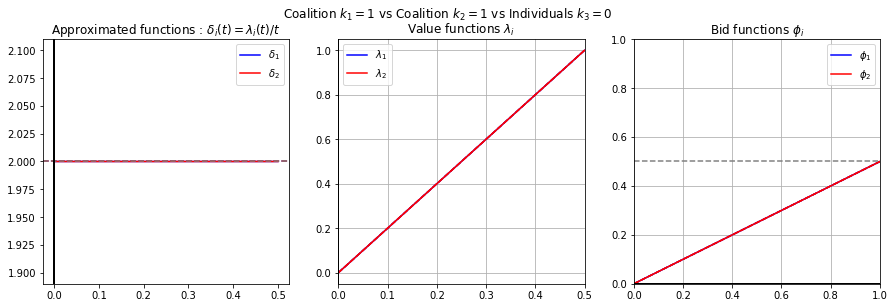

In [7]:
iterateGU(1,1,0,display_graphs=True,show_msg=True);

Nb of eval : 2
eps_star : 0.0
tstar : 0.8


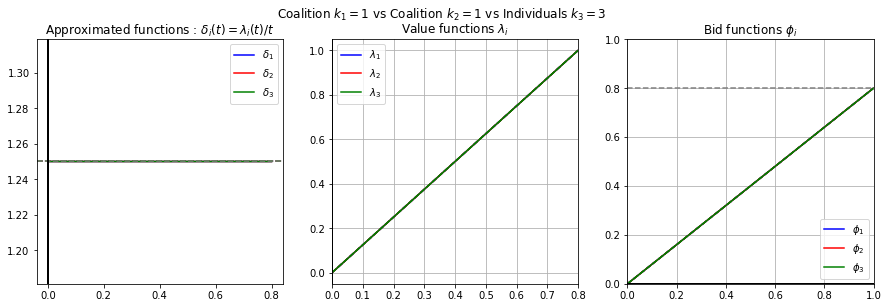

In [6]:
iterateGU(1,1,3,display_graphs=True,show_msg=True);

#### 2 symetric Beta$(\alpha,1)$-bidders <br>
$\implies$ linear bid functions $v \mapsto \frac{\alpha}{\alpha+1}v$

Nb of eval : 2
eps_star : 0.0
tstar : 0.6666666666666666


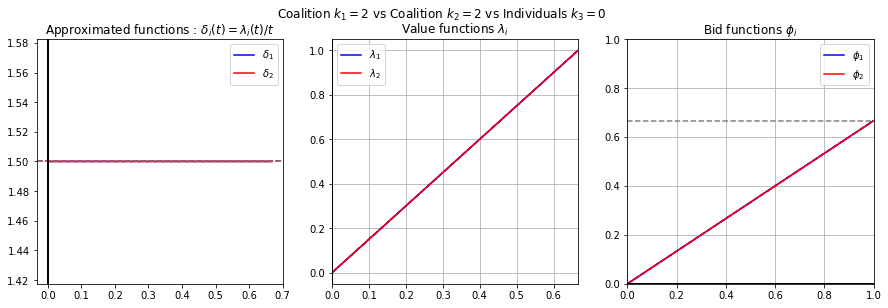

In [7]:
iterateGU(2,2,0,show_msg=True,display_graphs=True);

#### [Marshall1994] Fig1 page 205 :  $k_1=4, k_2=1, k_3=0$

Nb of eval : 28
eps_star : 5.1989699355485246e-05
tstar : 0.6373710009110503


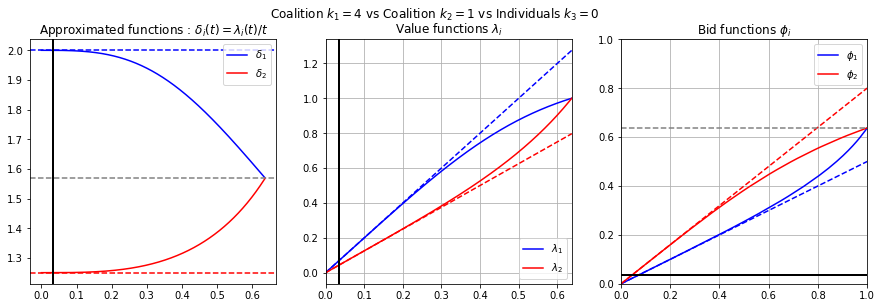

In [8]:
iterateGU(4,1,0,eps=10**-4,show_msg=True,display_graphs=True);

#### [Marshall1994] Fig3 page 213 :  $k_1=99, k_2=0, k_3=2$ or equivalently $k_1=99, k_2=1, k_3=1$

Nb of eval : 38
eps_star : 8.432842210154053e-06
tstar : 0.8411144309341715


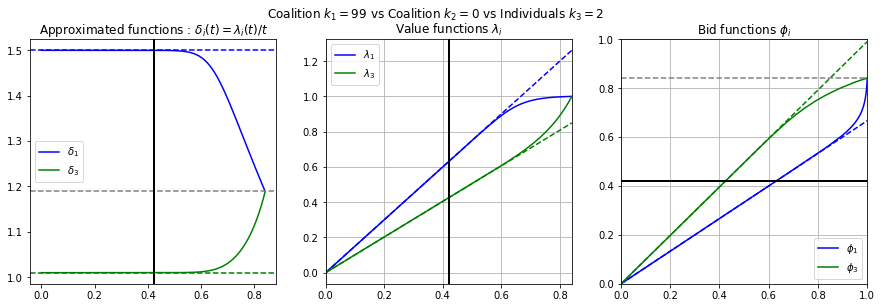

In [72]:
iterateGU(99,0,2,eps=10**-5,display_graphs=True,show_msg=True);

Nb of eval : 41
eps_star : 8.849952394986824e-06
tstar : 0.8411144314740581


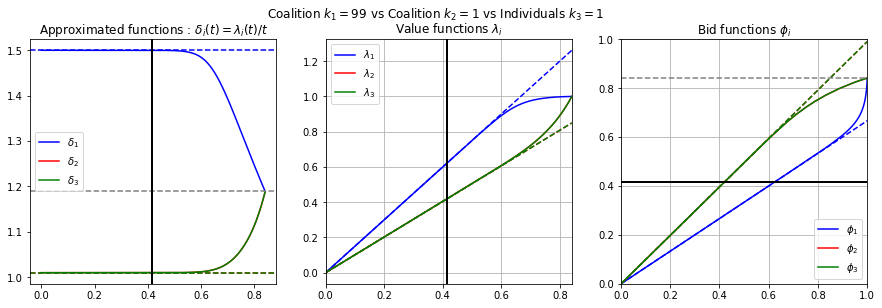

In [73]:
iterateGU(99,1,1,eps=10**-5,show_msg=True,display_graphs=True);

#### New asymetric test : $k_1=8,k_2=4,k_3=1$

Nb of eval : 32
eps_star : 5.585663376663246e-06
tstar : 0.7869532318043985


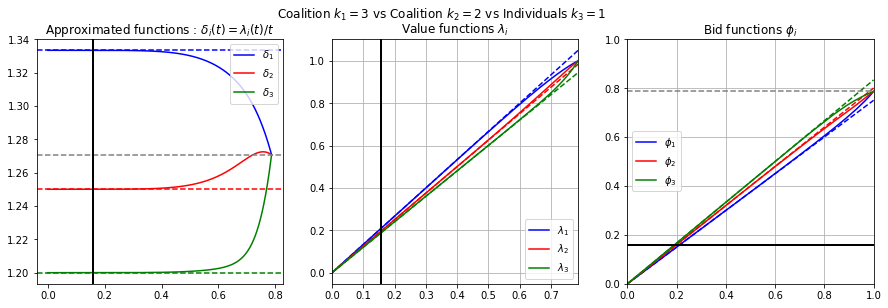

In [74]:
iterateGU(3,2,1,eps=10**-5,show_msg=True,display_graphs=True);

#### New asymetric test : $k_1=2.5,k_2=2,k_3=1$

Nb of eval : 30
eps_star : 7.0805824671136655e-06
tstar : 0.7762295251785667


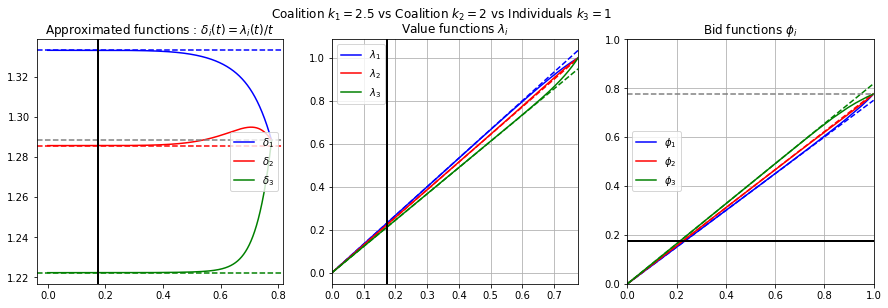

In [75]:
iterateGU(2.5,2,1,eps=10**-5,show_msg=True,display_graphs=True);